<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Analysis_of_University_Admissions_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of University Admissions Data
> Project team details:
> 1. Arnav Barman (102053038)
> 1. Aryan Baluja (102003375)

We have taken the [University admissions dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university) from kaggle and after it's analysis, we will predict the probability of admission of a student in particular university based on various parameters.

The different entities or parameters in the dataset are -
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )
---

## Loading the dataset

Importing Libraries

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

Loading dataset

In [5]:
adm = pd.read_csv("/content/adm_data.csv")
print("Printing the first and last 5 rows of the data")
adm.head()

Printing the first and last 5 rows of the data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
adm.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


## About the dataset

In [7]:
print("Printing out the description of data")
print("___________________________________________________")
adm.describe()

Printing out the description of data
___________________________________________________


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
print("Printing out the info of dataset")
print("___________________________________________________")
adm.info()

Printing out the info of dataset
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
adm=adm.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [11]:
print("Printing out the datatypes of columns:")
print("___________________________________________________")
adm.dtypes

Printing out the datatypes of columns:
___________________________________________________


SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [12]:
print("Printing out the shape of dataset:")
adm.shape

Printing out the shape of dataset:


(400, 9)

## Preprocessing of data

We now check how many NULL values we have in the dataset.

In [13]:
adm.isnull().values.any()

False

In [14]:
adm.isnull().sum()

SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

From the above analysis, we found out that our data has no null values.

The Serial No. data is also of no significance as it is unique descriptor for all the instances in the dataset.

In [15]:
adm=adm.drop(['SerialNo'],axis=1)

> As the dataset we have contains only 400 instances, we will synthetically generate new data to support our original dataset using the [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV). We will further compare our models using the original as well as synthetically modified datasets.

In [16]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sdv.tabular import GaussianCopula as GC
GCModel = GC()
GCModel.fit(adm)

In [18]:
new1 = GCModel.sample(400)

In [19]:
new1.shape

(400, 8)

In [20]:
new2 = GCModel.sample(800)

In [21]:
new2.shape

(800, 8)

In [22]:
adm1 = pd.concat([adm, new1], ignore_index=True)
adm1.shape

(800, 8)

In [23]:
adm2 = pd.concat([adm1, new2], ignore_index=True)
adm2.shape

(1600, 8)

## Data Visualisation

### EDA of the original dataset.

In [24]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


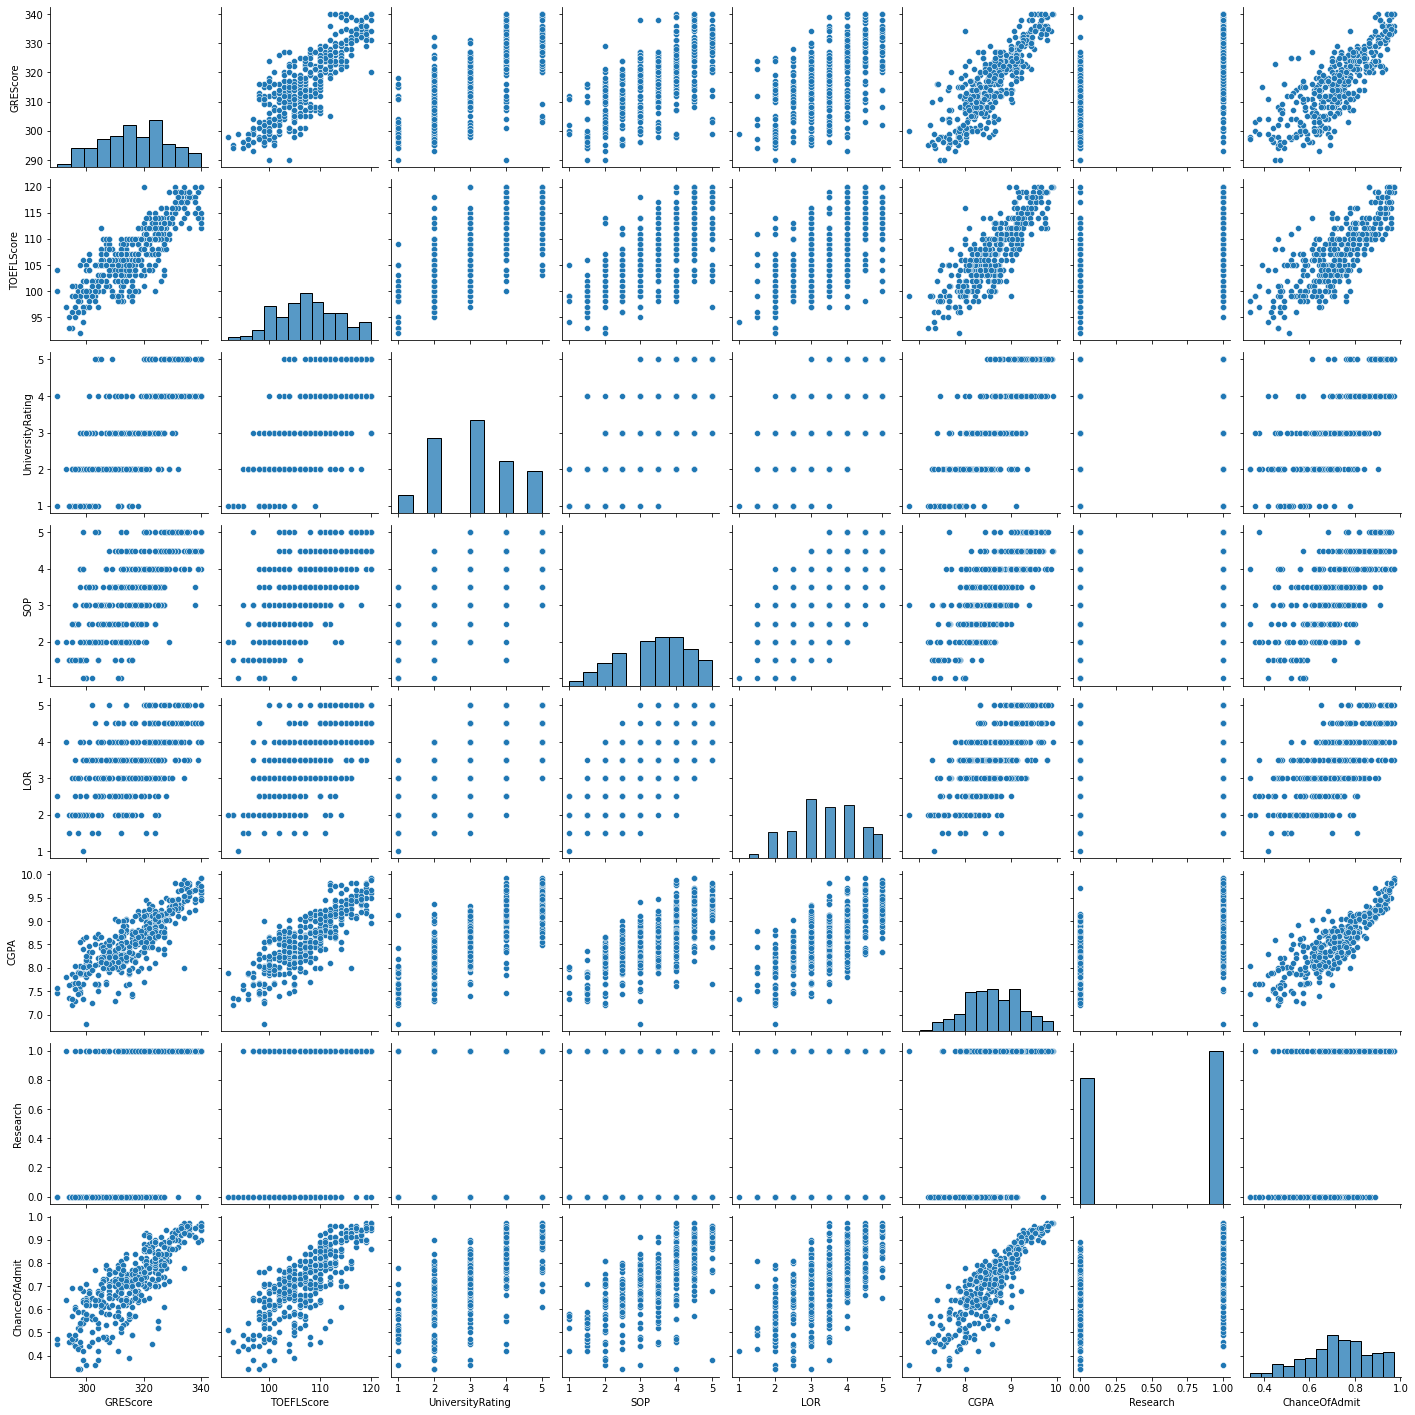

In [25]:
sns.pairplot(adm)
plt.show()

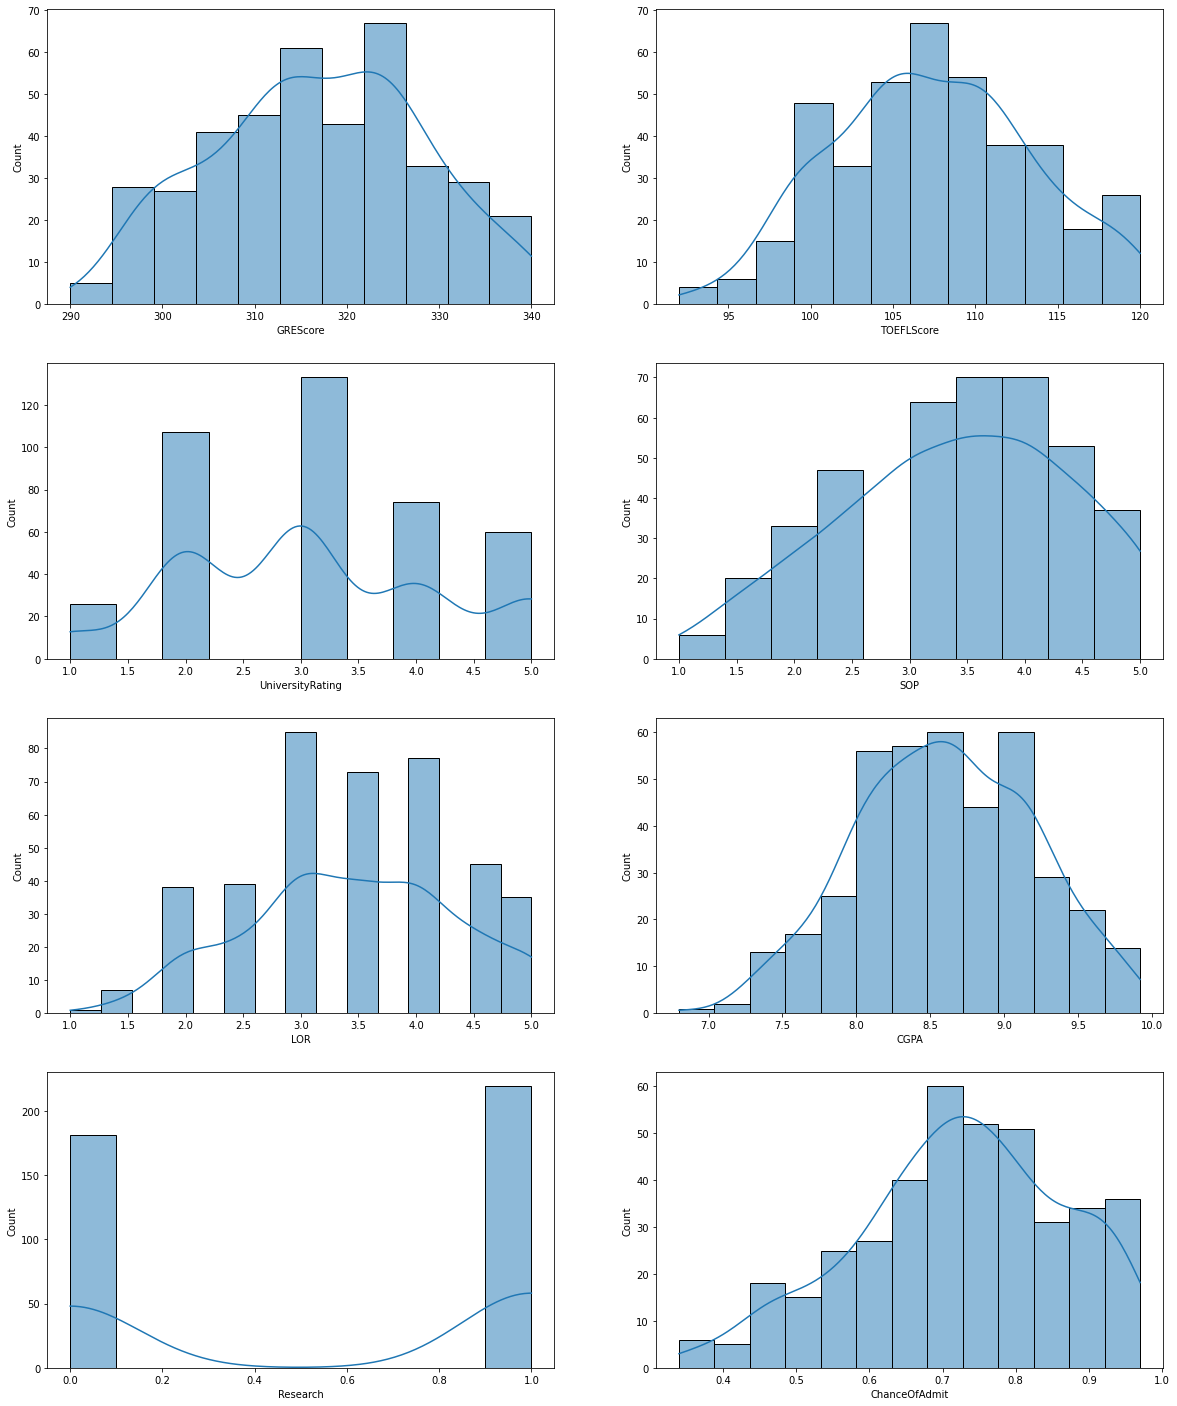

In [26]:
plt.figure(figsize=(20,25))
i = 0
for item in adm.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm[item],kde=True)
plt.show()

<AxesSubplot:>

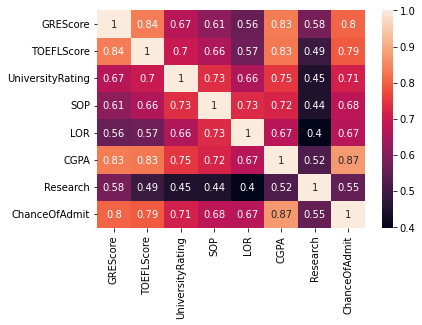

In [27]:
print()
adm.corr()
sns.heatmap(adm.corr(),annot=True)

In [28]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

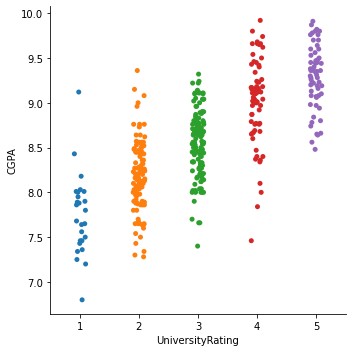

In [29]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm) #can add hue
plt.show()

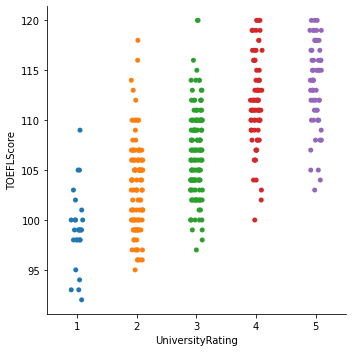

In [30]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm) #can add hue
plt.show()

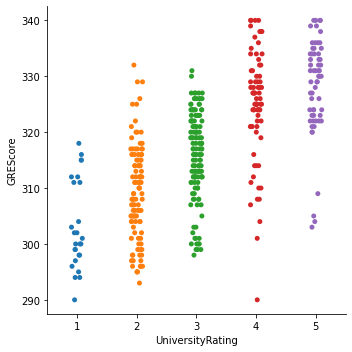

In [31]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm) #can add hue
plt.show()

### GRE Score Analysis:

In [32]:
print("Max GRE Score :",max(adm.GREScore))
print("Min GRE Score :",min(adm.GREScore))

Max GRE Score : 340
Min GRE Score : 290


In [33]:
maxvalues=adm[adm.GREScore>=325]
meanvalues=adm[(adm.GREScore>305)&(adm.GREScore<325)]
minvalues=adm[(adm.GREScore<=305)]

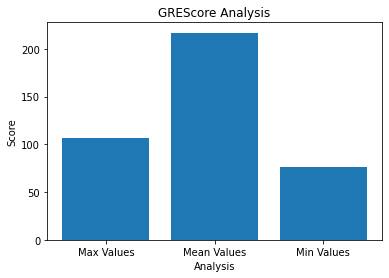

In [34]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
plt.bar(x,y)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

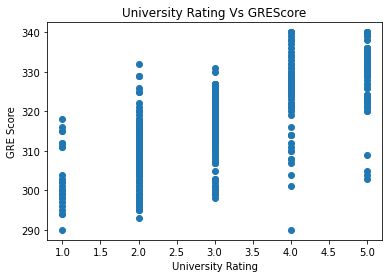

In [35]:
plt.scatter(x='UniversityRating',y='GREScore',data=adm)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

### TOEFL Score Analysis:

In [36]:
print("Min TOEFLScore :",min(adm.TOEFLScore))
print("Max TOEFLScore :",max(adm.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


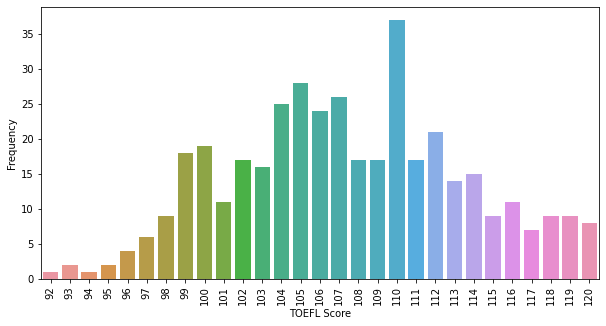

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=adm.TOEFLScore.value_counts().index,y=adm.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.show()

### University Rating Analysis:

In [38]:
adm.UniversityRating.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: UniversityRating, dtype: int64

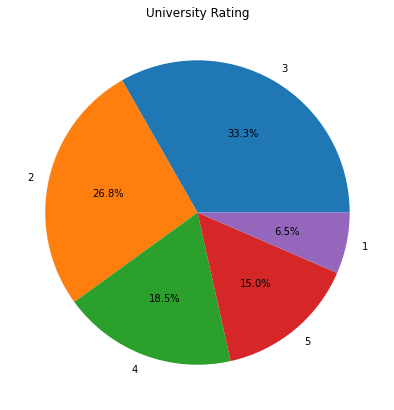

In [39]:
plt.figure(figsize=(7,7))
plt.pie(adm.UniversityRating.value_counts().values,labels=adm.UniversityRating.value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.show()

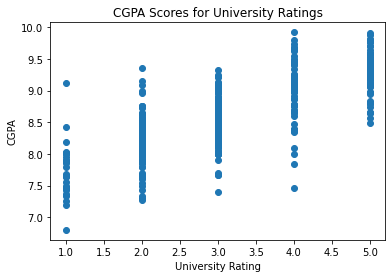

In [40]:
plt.scatter(adm.UniversityRating,adm.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [41]:
adm.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.884615,2.211538,7.745769
2,2.705607,2.925234,8.183738
3,3.364662,3.402256,8.552256
4,4.108108,4.006757,9.021622
5,4.500000,4.358333,9.291167


### CGPA Analysis

In [42]:
print("Min CGPA Score :",min(adm.CGPA))
print("Max CGPA Score :",max(adm.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


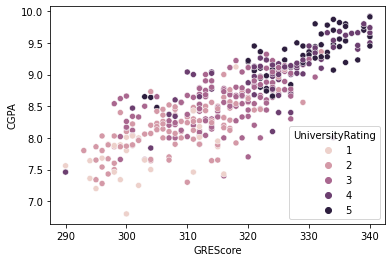

In [43]:
sns.scatterplot(y="CGPA", x="GREScore",hue="UniversityRating",data=adm)
plt.show()

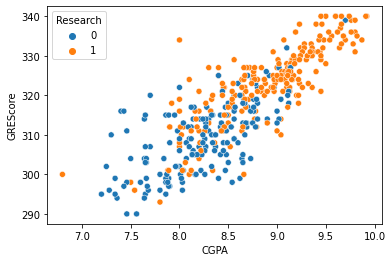

In [44]:
sns.scatterplot(x="CGPA", y="GREScore",hue="Research", data=adm)
plt.show()

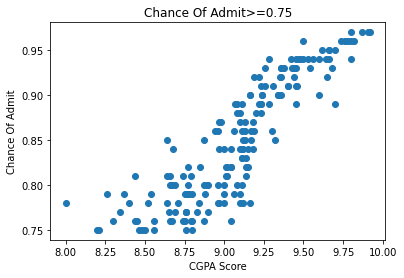

In [45]:
plt.scatter(x=adm[adm.ChanceOfAdmit >=0.75].CGPA,y=adm[adm.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.show()

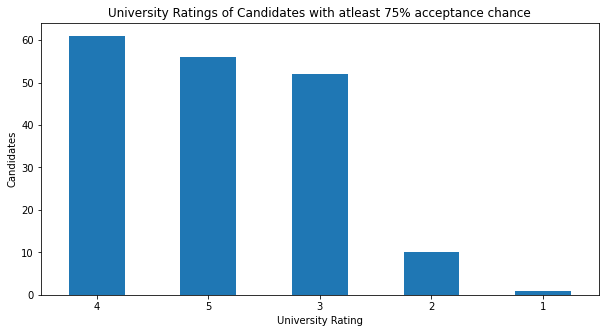

In [46]:
s = adm[adm["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts()
plt.title("University Ratings of Candidates with atleast 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

### EDA of new data (adm1)

In [47]:
adm1.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


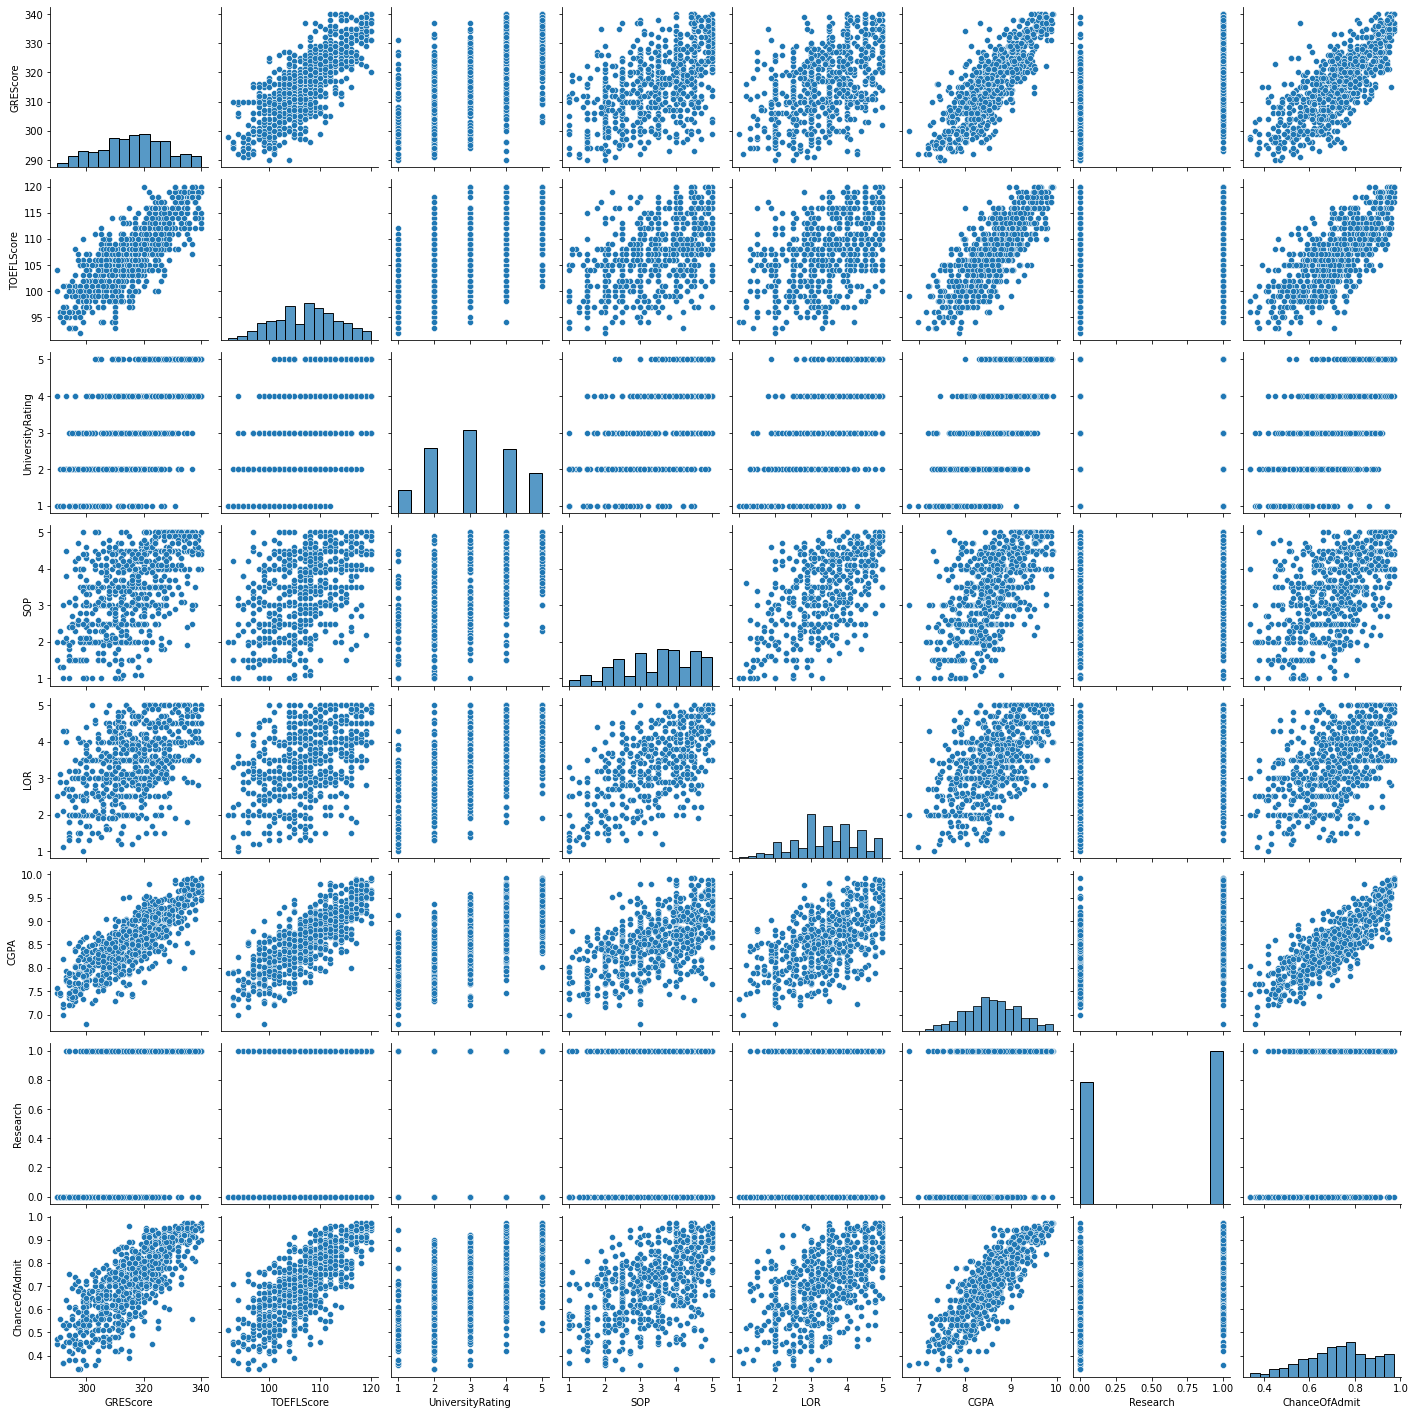

In [48]:
sns.pairplot(adm1)
plt.show()

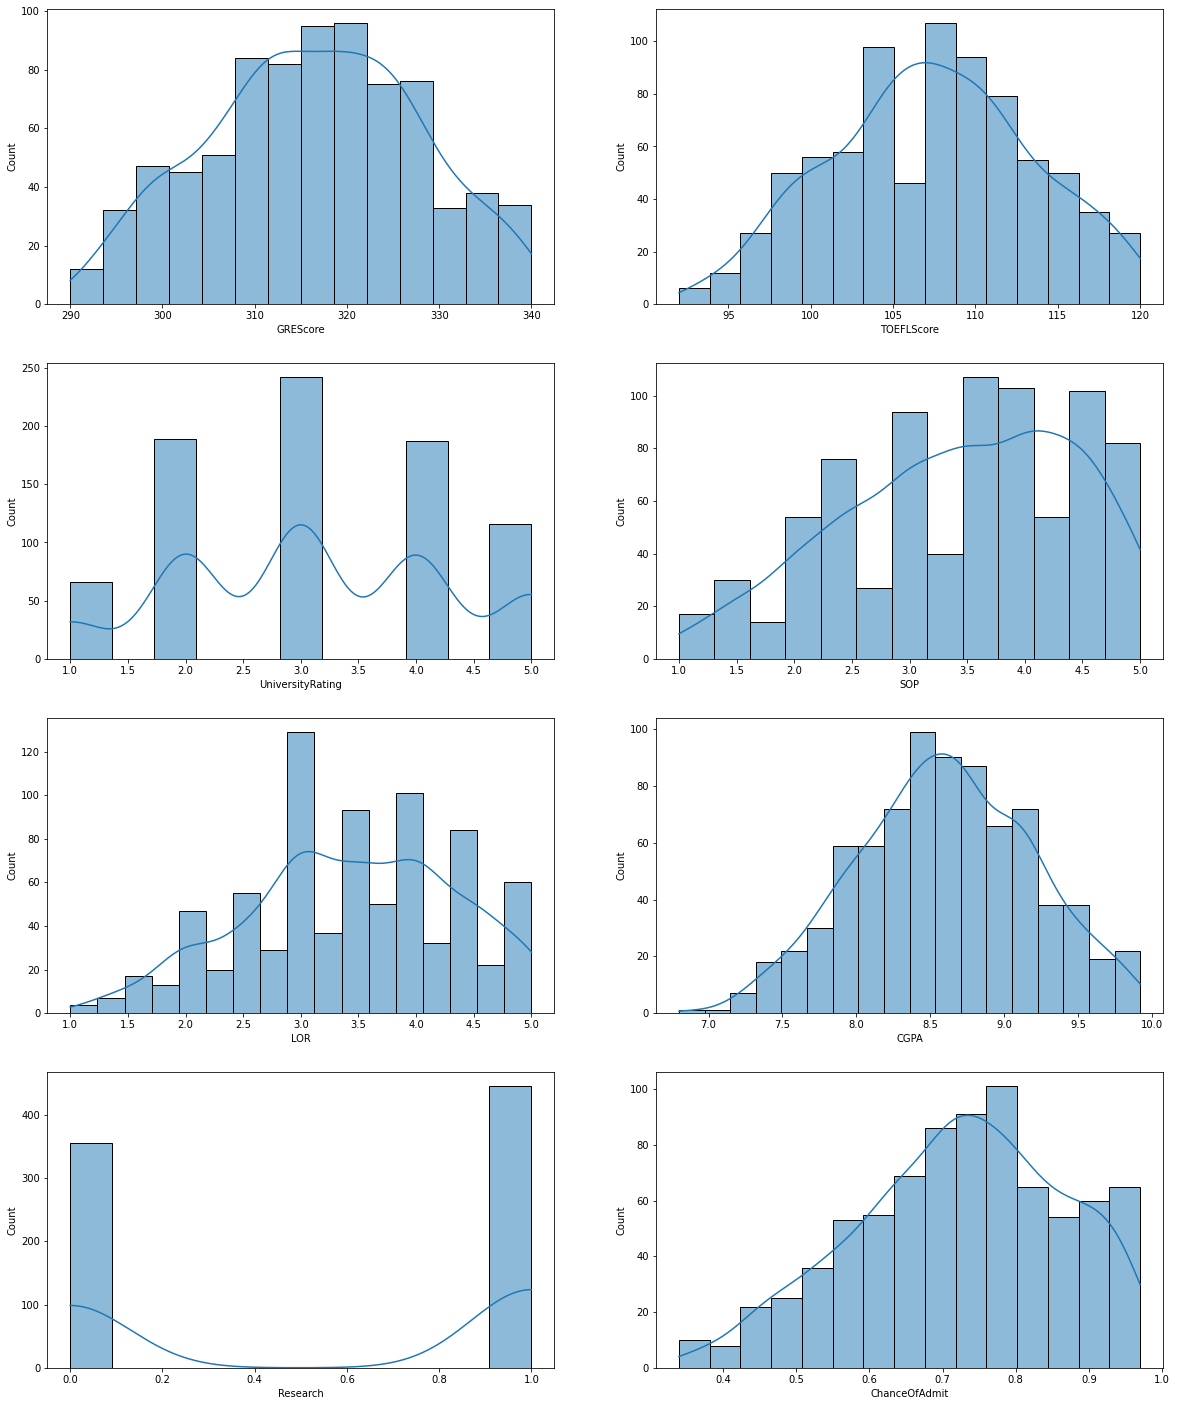

In [49]:
plt.figure(figsize=(20,25))
i = 0
for item in adm1.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm1[item],kde=True)
plt.show()

<AxesSubplot:>

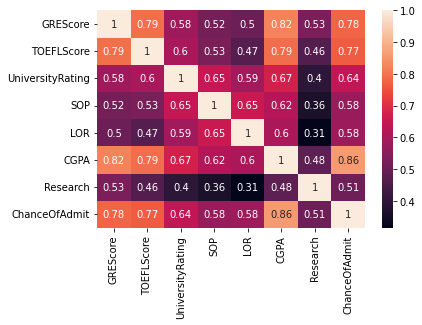

In [50]:
print()
adm1.corr()
sns.heatmap(adm1.corr(),annot=True)

In [51]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

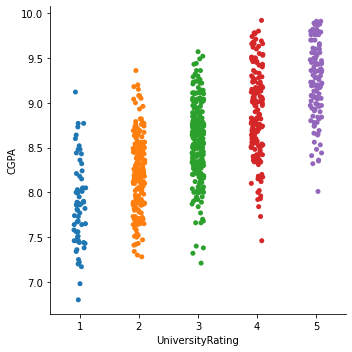

In [52]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm1) #can add hue
plt.show()

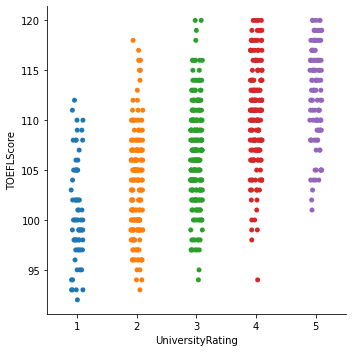

In [53]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm1) #can add hue
plt.show()

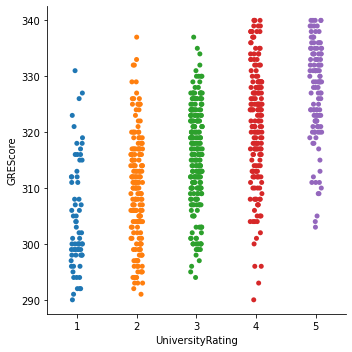

In [54]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm1) #can add hue
plt.show()

### EDA of new data (adm2)

In [55]:
adm2.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


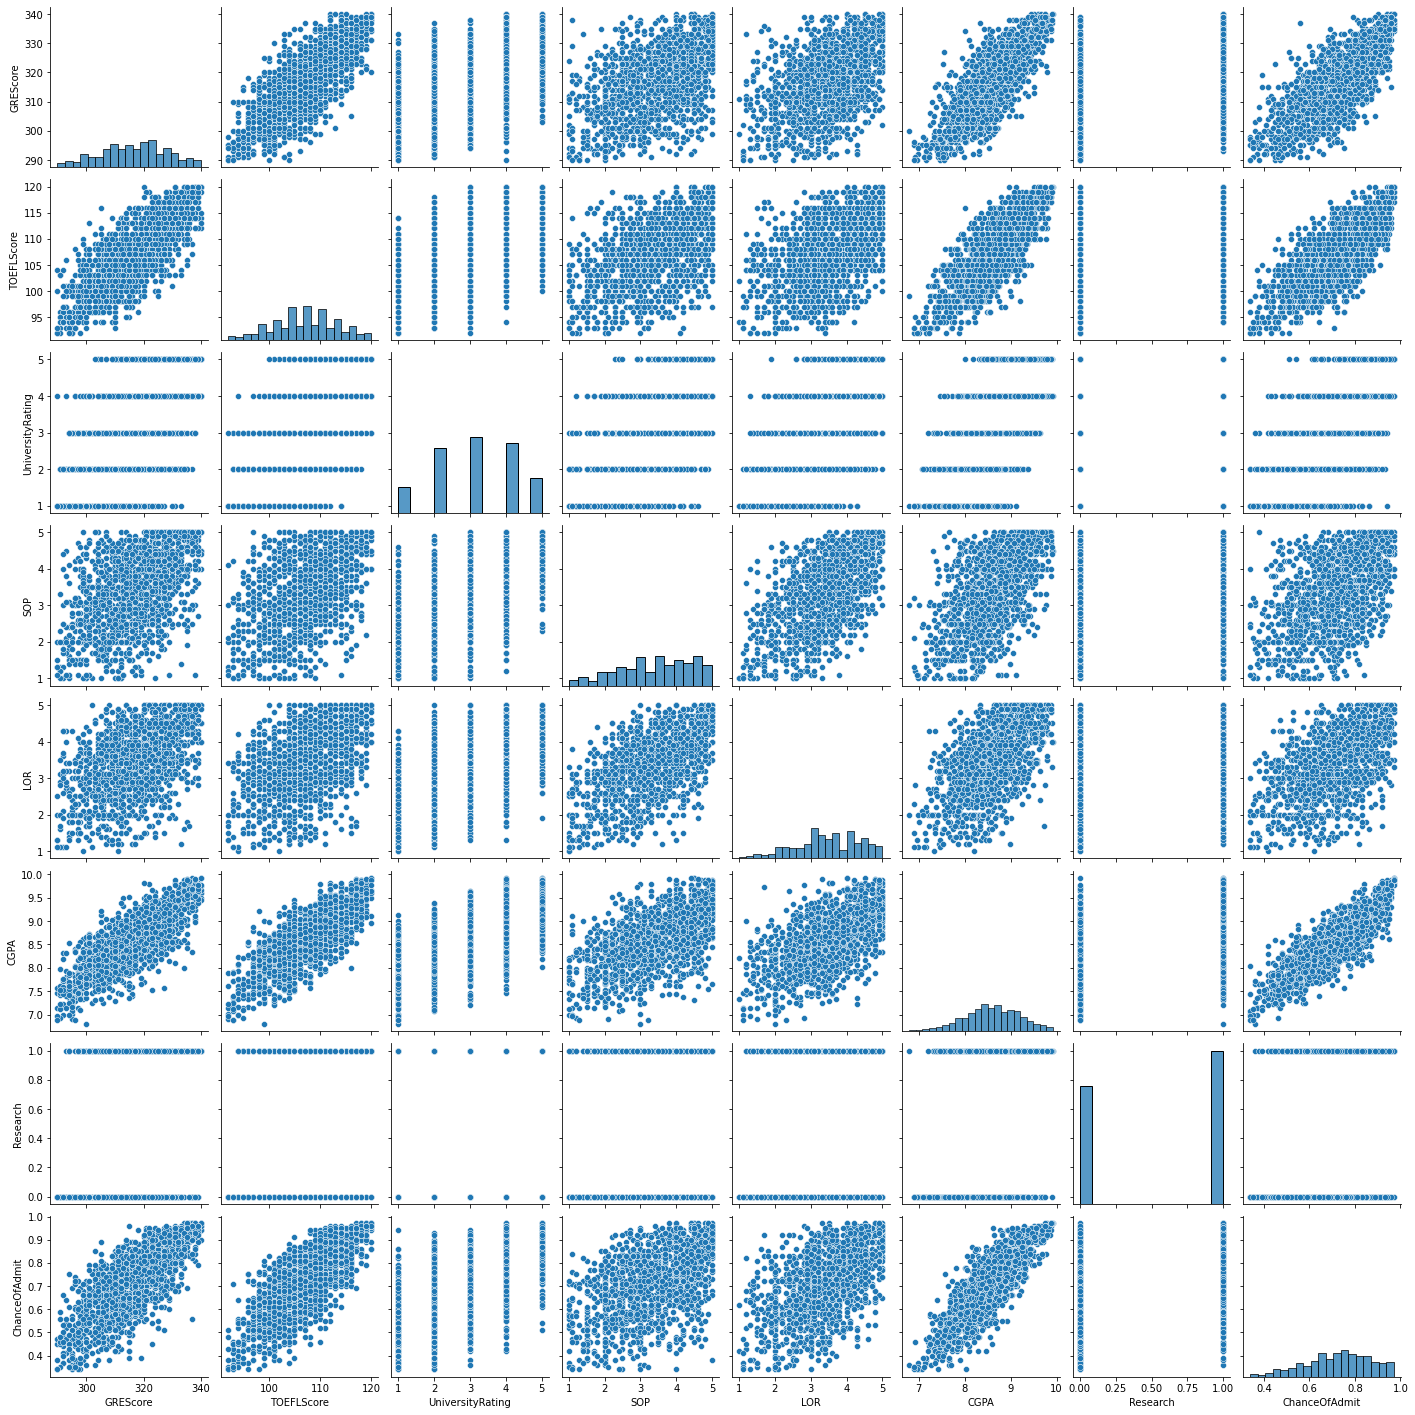

In [56]:
sns.pairplot(adm2)
plt.show()

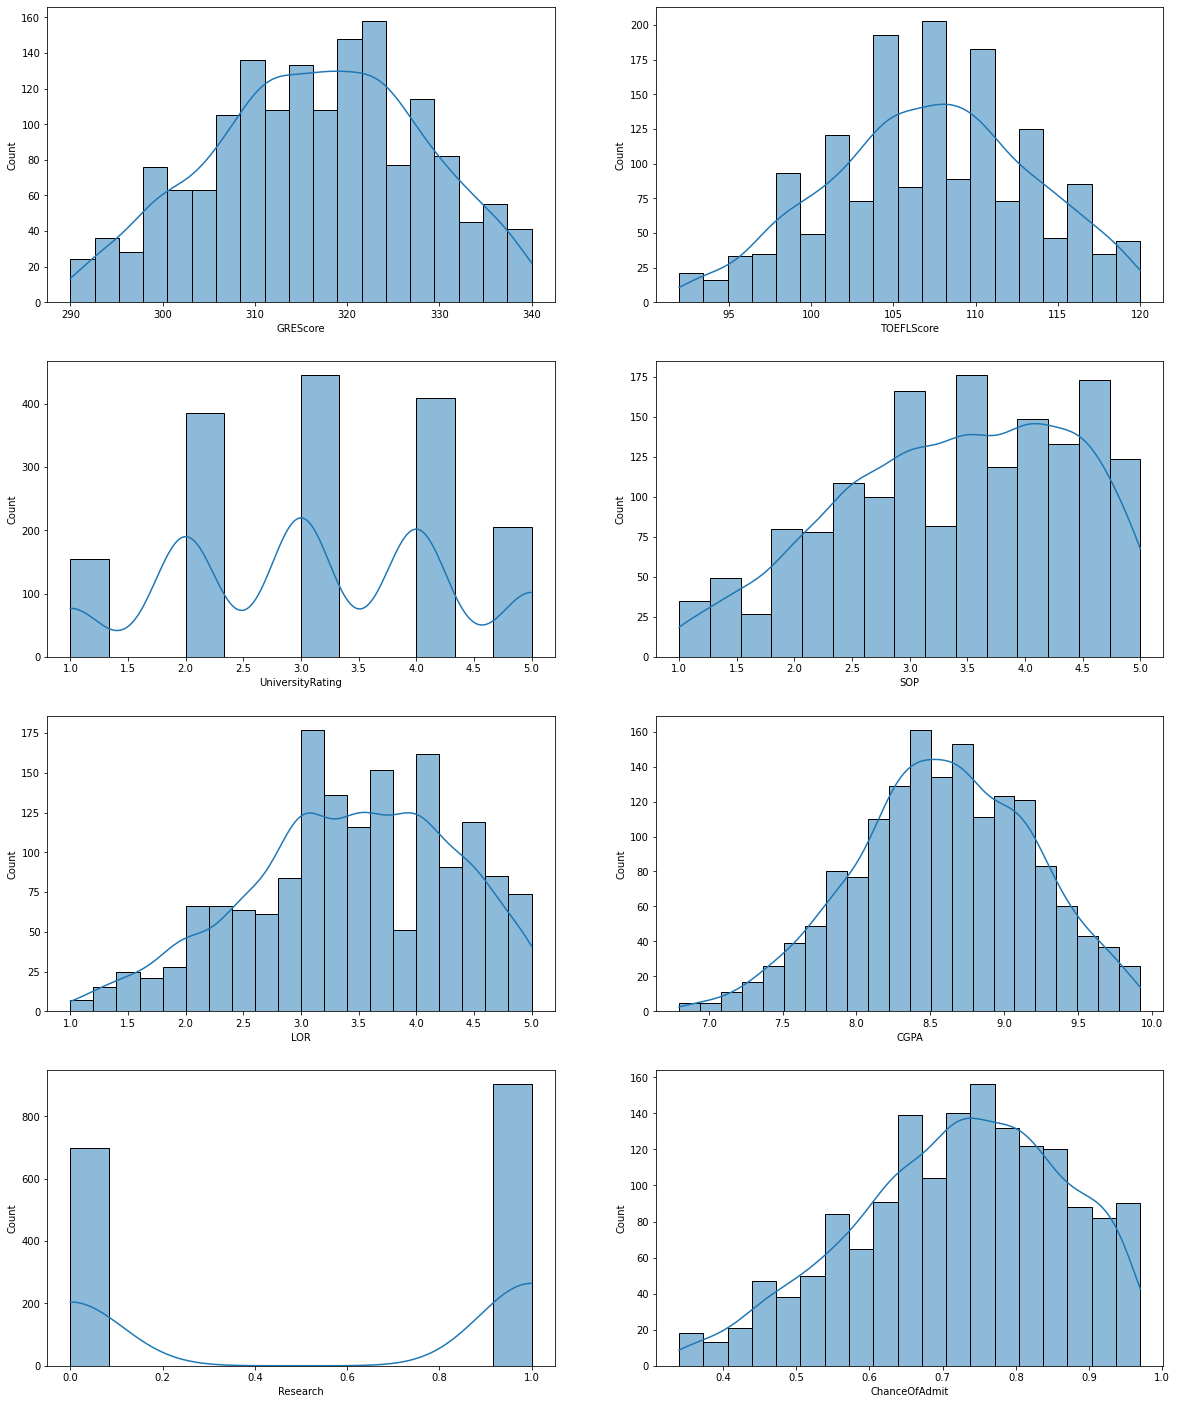

In [57]:
plt.figure(figsize=(20,25))
i = 0
for item in adm2.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm2[item],kde=True)
plt.show()

<AxesSubplot:>

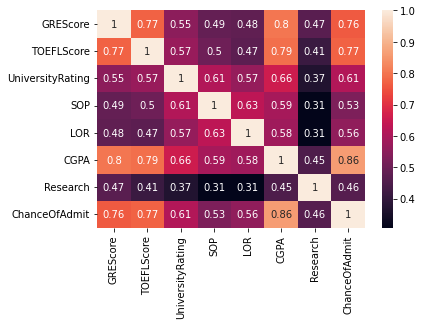

In [58]:
adm2.corr()
sns.heatmap(adm2.corr(),annot=True)

In [59]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

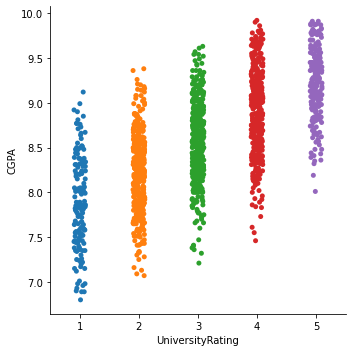

In [60]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm2) #can add hue
plt.show()

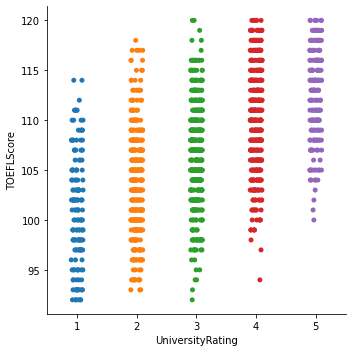

In [61]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm2) #can add hue
plt.show()

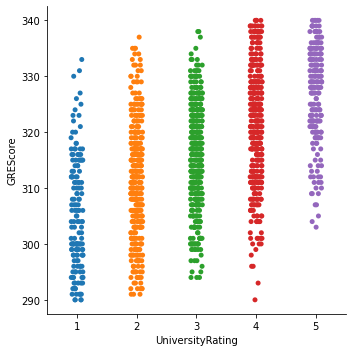

In [62]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm2) #can add hue
plt.show()

### Comparing description of datasets (Original and synthetically modified)

In [63]:
admdes = adm.describe()

In [64]:
admdes1 = adm1.describe()

In [65]:
admdes2 = adm2.describe()

In [66]:
admdes.compare(admdes1, align_axis=1, keep_shape=False, keep_equal=False)

GREScore              TOEFLScore             UniversityRating  \
             self       other        self       other             self   
count  400.000000  800.000000  400.000000  800.000000       400.000000   
mean   316.807500  316.353750  107.410000  107.358750         3.087500   
std     11.473646   11.517462    6.069514    6.152834         1.143728   
25%           NaN         NaN         NaN         NaN              NaN   
50%           NaN         NaN         NaN         NaN              NaN   
75%           NaN         NaN         NaN         NaN              NaN   

                         SOP                     LOR                    CGPA  \
           other        self       other        self       other        self   
count  800.00000  400.000000  800.000000  400.000000  800.000000  400.000000   
mean     3.12250    3.400000    3.433250    3.452500    3.436000    8.598925   
std      1.16906    1.006869    1.005427    0.898478    0.908535    0.596317   
25%          NaN    2.500000    2.700000    3.000000    2.900000    8.170000   
50%          NaN         NaN         NaN         NaN         NaN    8.610000   
75%          NaN    4.000000    4.225000         NaN         NaN    9.062500   

                     Research             ChanceOfAdmit              
            other        self       other          self       other  
count  800.000000  400.000000  800.000000    400.000000  800.000000  
mean     8.598900    0.547500    0.556250      0.724350    0.723100  
std      0.590155    0.498362    0.497137      0.142609    0.142089  
25%      8.197500         NaN         NaN      0.640000    0.630000  
50%      8.600000         NaN         NaN           NaN         NaN  
75%      9.040000         NaN         NaN           NaN         NaN

In [67]:
admdes.compare(admdes2, align_axis=1, keep_shape=False, keep_equal=False)

GREScore               TOEFLScore              UniversityRating  \
             self        other        self        other             self   
count  400.000000  1600.000000  400.000000  1600.000000       400.000000   
mean   316.807500   316.569375  107.410000   107.194375         3.087500   
std     11.473646    11.423901    6.069514     6.191470         1.143728   
25%    308.000000   309.000000         NaN          NaN              NaN   
50%           NaN          NaN         NaN          NaN              NaN   
75%           NaN          NaN         NaN          NaN              NaN   

                           SOP                      LOR               \
             other        self        other        self        other   
count  1600.000000  400.000000  1600.000000  400.000000  1600.000000   
mean      3.078750    3.400000     3.391125    3.452500     3.428813   
std       1.180432    1.006869     1.006251    0.898478     0.897931   
25%            NaN    2.500000     2.600000    3.000000     2.900000   
50%            NaN         NaN          NaN         NaN          NaN   
75%            NaN    4.000000     4.200000    4.000000     4.100000   

             CGPA                 Research              ChanceOfAdmit  \
             self        other        self        other          self   
count  400.000000  1600.000000  400.000000  1600.000000    400.000000   
mean     8.598925     8.592187    0.547500     0.563750      0.724350   
std      0.596317     0.596105    0.498362     0.496074      0.142609   
25%      8.170000     8.200000         NaN          NaN      0.640000   
50%      8.610000     8.600000         NaN          NaN           NaN   
75%      9.062500     9.040000         NaN          NaN           NaN   

                    
             other  
count  1600.000000  
mean      0.721669  
std       0.143539  
25%       0.627500  
50%            NaN  
75%            NaN

### Using Different Models

In [104]:
X=adm.drop(['ChanceOfAdmit'],axis=1)
y=adm['ChanceOfAdmit']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#min max scaling
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train)) * 10
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test)) * 10

In [113]:
X1=adm1.drop(['ChanceOfAdmit'],axis=1)
y1=adm1['ChanceOfAdmit']

#train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#min max scaling
X1_train = (X1_train - np.min(X1_train))/(np.max(X1_train)-np.min(X1_train)) * 10
X1_test = (X1_test - np.min(X1_test))/(np.max(X1_test)-np.min(X1_test)) * 10

In [114]:
X2=adm2.drop(['ChanceOfAdmit'],axis=1)
y2=adm2['ChanceOfAdmit']

#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#min max scaling
X2_train = (X2_train - np.min(X2_train))/(np.max(X2_train)-np.min(X2_train)) * 10
X2_test = (X2_test - np.min(X2_test))/(np.max(X2_test)-np.min(X2_test)) * 10

In [107]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()

from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300)

from sklearn.neighbors import KNeighborsRegressor
knn2 = KNeighborsRegressor(n_neighbors=2)
knn10 = KNeighborsRegressor(n_neighbors=10)

In [108]:
ModelList = (lir,dtr,rfr,knn2,knn10)

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.8221063439698572
Score For Test Data : 0.6712219127058386
The mean absolute error: 0.05669363159395597
The mean squared error: 0.0056583599263978265
The root mean squared error: 0.0752220707398954
The R2 Score: 0.6712219127058386




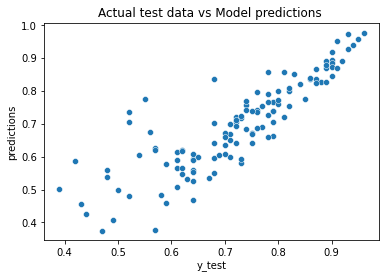



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.17955968637913677
The mean absolute error: 0.0895
The mean squared error: 0.014119999999999999
The root mean squared error: 0.11882760622010358
The R2 Score: 0.17955968637913677




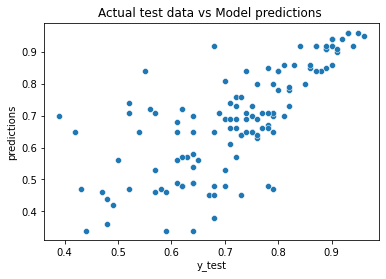



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.9693306182528902
Score For Test Data : 0.5956055504646567
The mean absolute error: 0.06220000000000002
The mean squared error: 0.006959738000000008
The root mean squared error: 0.08342504420136682
The R2 Score: 0.5956055504646567




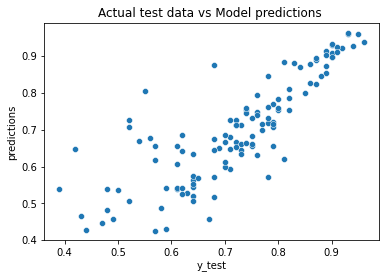



****************************************************************************************************
KNeighborsRegressor(n_neighbors=2)


Score For Train Data : 0.9013175865124782
Score For Test Data : 0.6262890497801097
The mean absolute error: 0.059083333333333335
The mean squared error: 0.006431666666666665
The root mean squared error: 0.0801976724516782
The R2 Score: 0.6262890497801097




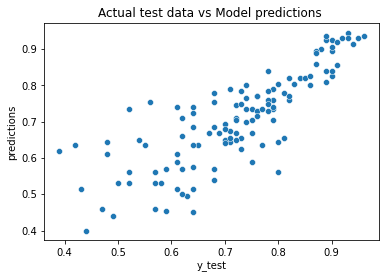



****************************************************************************************************
KNeighborsRegressor(n_neighbors=10)


Score For Train Data : 0.8023087397040944
Score For Test Data : 0.7364161177978752
The mean absolute error: 0.051566666666666656
The mean squared error: 0.004536349999999998
The root mean squared error: 0.06735243128499518
The R2 Score: 0.7364161177978752




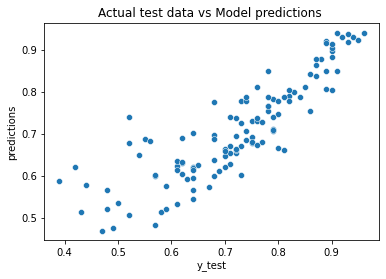

<BarContainer object of 5 artists>

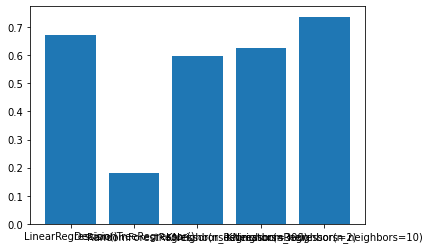

In [139]:
scores1 = {}
for i in ModelList:
  i.fit(X_train,y_train)
  pred = i.predict(X_test)
  print("*"*100)
  print(i)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X_train,y_train)))
  print('Score For Test Data : {}'.format(i.score(X_test,y_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
  r2 = metrics.r2_score(y_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  raw = f"{i}"
  scores1[raw] = r2

plt.bar(scores1.keys(),scores1.values())

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.7779669037222955
Score For Test Data : 0.7620408055686423
The mean absolute error: 0.05292581777330132
The mean squared error: 0.00479353883419958
The root mean squared error: 0.06923538715281066
The R2 Score: 0.7620408055686423




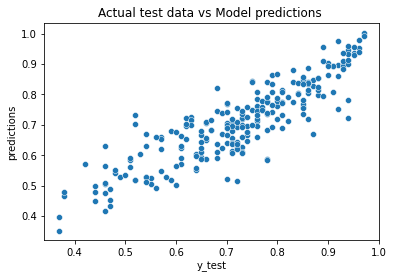



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.4950616465740062
The mean absolute error: 0.07733333333333334
The mean squared error: 0.010171666666666666
The root mean squared error: 0.10085468093582303
The R2 Score: 0.4950616465740062




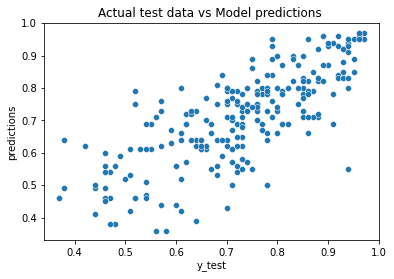



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.963780733628751
Score For Test Data : 0.7172621644387248
The mean absolute error: 0.05783680555555558
The mean squared error: 0.0056955764953703645
The root mean squared error: 0.07546904329173892
The R2 Score: 0.7172621644387248




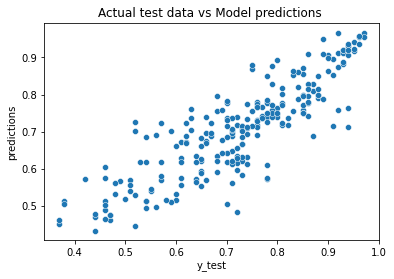



****************************************************************************************************
KNeighborsRegressor(n_neighbors=2)


Score For Train Data : 0.880140091800385
Score For Test Data : 0.5942777307455668
The mean absolute error: 0.06877083333333335
The mean squared error: 0.008173020833333332
The root mean squared error: 0.09040476112093507
The R2 Score: 0.5942777307455668




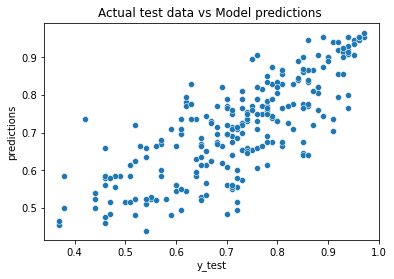



****************************************************************************************************
KNeighborsRegressor(n_neighbors=10)


Score For Train Data : 0.7687152582481975
Score For Test Data : 0.6805468579720402
The mean absolute error: 0.06134999999999999
The mean squared error: 0.006435183333333333
The root mean squared error: 0.08021959444757455
The R2 Score: 0.6805468579720402




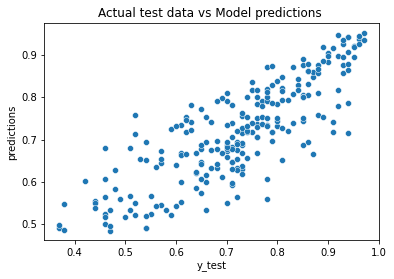

<BarContainer object of 5 artists>

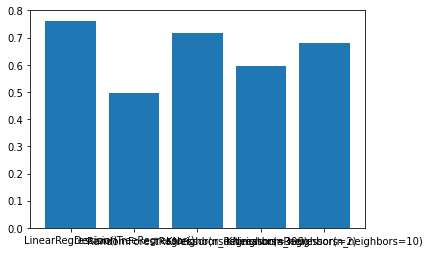

In [134]:
scores2 = {}
for i in ModelList:
  i.fit(X1_train,y1_train)
  pred = i.predict(X1_test)
  print("*"*100)
  raw = f"{i}"
  print(raw)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X1_train,y1_train)))
  print('Score For Test Data : {}'.format(i.score(X1_test,y1_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y1_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y1_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y1_test, pred)))
  r2 = metrics.r2_score(y1_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y1_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  scores2[raw] = r2

plt.bar(scores2.keys(),scores2.values())

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.7808035634703595
Score For Test Data : 0.7636903957751835
The mean absolute error: 0.05414026621007153
The mean squared error: 0.0046963693816704415
The root mean squared error: 0.06853006188287328
The R2 Score: 0.7636903957751835




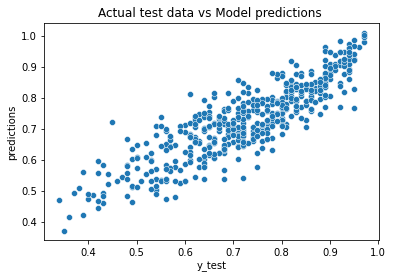



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.475135976841367
The mean absolute error: 0.07910416666666667
The mean squared error: 0.010431041666666667
The root mean squared error: 0.1021324711669441
The R2 Score: 0.475135976841367




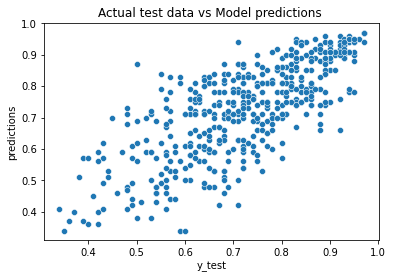



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.9638342551768031
Score For Test Data : 0.7300236436816334
The mean absolute error: 0.057436458333333294
The mean squared error: 0.0053654556180555545
The root mean squared error: 0.07324927042678005
The R2 Score: 0.7300236436816334




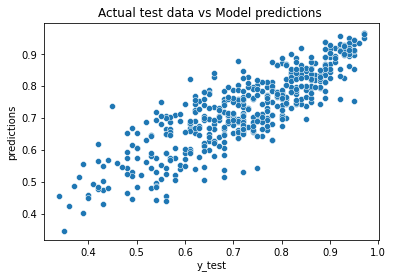



****************************************************************************************************
KNeighborsRegressor(n_neighbors=2)


Score For Train Data : 0.8721118214772172
Score For Test Data : 0.6152912024226832
The mean absolute error: 0.06991666666666667
The mean squared error: 0.0076456250000000005
The root mean squared error: 0.08743926463551716
The R2 Score: 0.6152912024226832




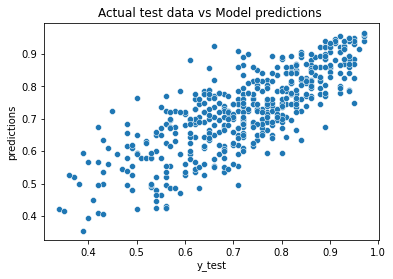



****************************************************************************************************
KNeighborsRegressor(n_neighbors=10)


Score For Train Data : 0.7761298869787604
Score For Test Data : 0.7067345725897864
The mean absolute error: 0.059593749999999994
The mean squared error: 0.005828297916666666
The root mean squared error: 0.07634328992561602
The R2 Score: 0.7067345725897864




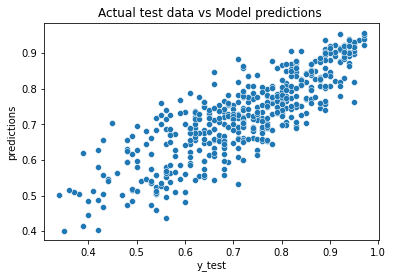

<BarContainer object of 5 artists>

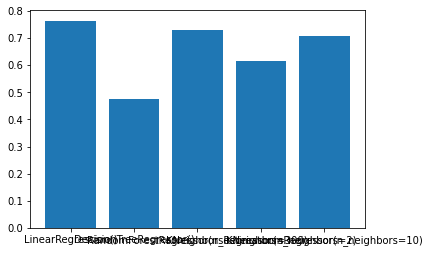

In [135]:
scores3 = {}
for i in ModelList:
  i.fit(X2_train,y2_train)
  pred = i.predict(X2_test)
  print("*"*100)
  raw = f"{i}"
  print(i)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X2_train,y2_train)))
  print('Score For Test Data : {}'.format(i.score(X2_test,y2_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y2_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y2_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y2_test, pred)))
  r2 = metrics.r2_score(y2_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y2_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  scores3[raw] = r2

plt.bar(scores3.keys(),scores3.values())

### compare datasets

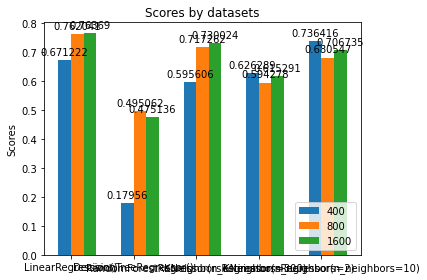

In [153]:
labels = scores1.keys()
ds1 = scores1.values()
ds2 = scores2.values()
ds3 = scores3.values()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ds1, width, label='400')
rects2 = ax.bar(x + width/2, ds2, width, label='800')
rects3 = ax.bar(x + 3*width/2, ds3, width, label='1600')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by datasets')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

plt.show()